In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image

from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

## Brownian Motion

The arithmetic Brownian motion is a type of stochastic process that models the random movement of financial asset prices over time.

Generating multiple paths of arithmetic Brownian motion through Monte Carlo simulations helps in visualizing how asset prices can evolve under random fluctuations. 

Euler's method is a fundamental numerical procedure for solving ordinary differential equations (ODEs) with a given initial value.
Consider an ODE of the form:

$ \frac{dy}{dt} = f(t, y(t)), \quad y(t_0) = y_0 $

where $y(t)$ is the unknown function to be solved for, $t$ is the independent variable, $y_0$ is the initial condition at time $t_0$, and $f(t, y(t))$ is a function that provides the derivative of $y(t)$ at any point $t$.

Euler's method approximates the solution by discretizing the time domain into small steps of size $dt$ and then linearly approximating the slope of the solution curve at each step. The value of $y(t)$ at the next time step is estimated using the formula:

$ y_{n+1} = y_n + f(t_n, y_n) \cdot dt $

where $y_n$ is the approximation of $y(t_n)$, and $t_{n+1} = t_n + dt$.

In the context of simulating Brownian Motion or Geometric Brownian Motion (GBM), which is commonly used in financial mathematics for modeling stock prices, Euler's method can be adapted to simulate the stochastic differential equations (SDEs) that describe these processes.

For Brownian Motion, the SDE can be simplified as:

$ dX_t = \mu dt + \sigma dW_t $

where $dX_t$ represents the change in the process $X$ over an infinitesimally small time interval $dt$, $\mu$ is the drift term, $\sigma$ is the volatility term, and $dW_t$ represents the increment of a Wiener process (or Brownian motion), which is normally distributed with mean 0 and variance $dt$.

Using Euler's method, the discrete approximation of this SDE over a time step $dt$ can be expressed as:

$ X_{t+dt} = X_t + \mu dt + \sigma \sqrt{dt} Z $

where $Z$ is a random draw from a standard normal distribution $(N(0,1))$ to simulate the random shock from the Wiener process.

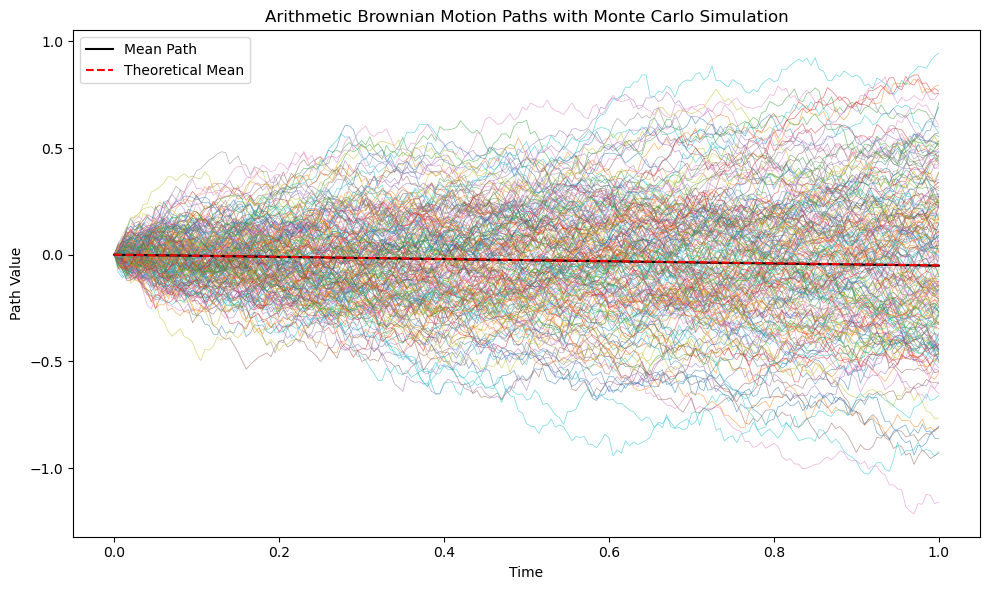

In [3]:
# Set the number of paths to simulate
npaths = 200000
# Total time for simulation (1 year)
T = 1
# Number of time steps within the year (daily steps)
nsteps = 200
# Time increment per step
dt = T / nsteps
# Drift coefficient of the Brownian motion (mean return)
mu = -0.05
# Volatility coefficient (standard deviation of returns)
sigma = 0.4
# Time grid for simulation
grid = np.linspace(0, T, nsteps + 1)

# Compute the increments of Brownian Motion using Euler's method
dX = mu * dt + sigma * np.random.randn(npaths, nsteps) * np.sqrt(dt)
# "numpy.random.randn" return a sample (or samples) from the standard normal distribution

# Prepend zeros for the initial condition (stock price at time 0)
zeros = np.zeros((npaths, 1))
X = np.hstack((zeros, dX))

# Accumulate the increments to get the path
XX = np.cumsum(X, axis=1)

# Plotting
plt.figure(figsize=(10, 6))  
# Plot a subset of paths to avoid overloading the plot
for i in range(0, len(XX), 1000):
    plt.plot(grid, XX[i], linewidth=0.5, alpha=0.6)  # Reduced line width and added transparency

# Plot the mean of all paths
plt.plot(grid, np.mean(XX, axis=0), 'k', label='Mean Path', linewidth=1.5)

# Plot the theoretical mean path: mu*t
plt.plot(grid, mu * grid, 'r--', label='Theoretical Mean', linewidth=1.5)

plt.title('Arithmetic Brownian Motion Paths with Monte Carlo Simulation')
plt.xlabel('Time')
plt.ylabel('Path Value')
plt.legend()
plt.tight_layout()
plt.show()

## Geometric Brownian Motion

GBM differs from arithmetic Brownian motion in that it assumes a log-normal distribution of prices, which implies that the prices cannot become negative and tend to follow a proportional growth pattern. This characteristic makes GBM more suitable for modeling stock prices than arithmetic Brownian motion.

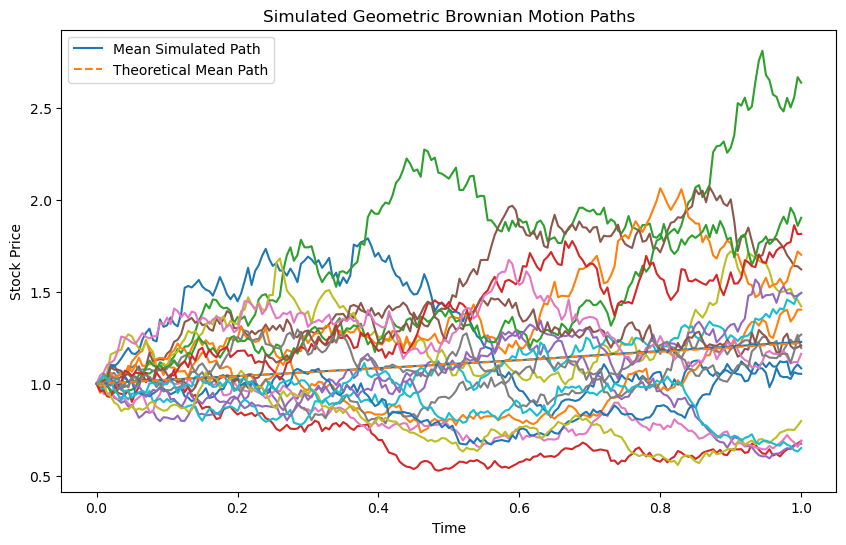

In [4]:
# Number of paths to simulate
npaths = 20000
# Total simulation time (1 year)
T = 1
# Initial stock price
S_0 = 1
# Number of steps (daily observations)
nsteps = 200
# Time increment per step
dt = T / nsteps
# Drift coefficient of the stock
mu = 0.2
# Volatility of the stock
sigma = 0.4
# Time grid for plotting
grid = np.arange(0, T + dt, dt)

# Computing the increments using Euler's method for GBM
# Note the correction term -0.5*sigma**2 to account for the drift bias in log space
dS = (mu - 0.5 * sigma ** 2) * dt + sigma * np.random.randn(npaths, nsteps) * (dt ** 0.5)

# Prepending zeros for the initial condition
zeros = np.zeros((npaths, 1))
X = np.hstack((zeros, dS))

# Cumulative sum to get the log of price relative changes
XX = np.cumsum(X, axis=1)

# Converting log-relative changes to actual stock prices
S = S_0 * np.exp(XX)

# Plotting a subset of simulated paths
plt.figure(figsize=(10, 6))  
for i in range(0, len(S), 1000):
    plt.plot(grid, S[i])
    
# Plotting the mean of the simulated paths
plt.plot(grid, np.mean(S, axis=0), label='Mean Simulated Path')

# Plotting the theoretical mean path using GBM's expected value
plt.plot(grid, np.exp(mu * grid), label='Theoretical Mean Path', linestyle='--')

plt.legend()
plt.title('Simulated Geometric Brownian Motion Paths')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()

## Analytical Solution

In the following implementation we assume $t_0=0$:

In [4]:
# Black-Scholes formula for call and put options
def black_scholes(S, K, r, T, v, option_type='C'):
    d1 = (np.log(S / K) + (r + 0.5 * v ** 2) * T) / (v * np.sqrt(T))
    d2 = d1 - v * np.sqrt(T)
    if option_type == 'C':
        price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'P':
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return price

This function calculates the price of a call or put option using the Black-Scholes formula, given the volatility $v$ ($\sigma$ in the original formula), the risk-free interest rate $r$, the current price of the underlying asset $S$, the strike price $K$, and the exercise date $T$.

In [7]:
# Configuration
flag = 'C'  # 'C' for call, 'P' for put option
K = 115  # Strike price of option
r = 0.05  # Interest rate
v = 0.5  # Volatility

# Creating grid
S, t = np.meshgrid(np.linspace(75, 130, 100), np.linspace(0.00001, 1, 100))
# Price of underlying; Time to maturity (measured in years)

Here we define the initial variables and parameters for the model.

In [11]:
# Calculating option price for calls and puts over the grid
Pc = black_scholes(S, K, r, t, v, option_type='C')
Pp = black_scholes(S, K, r, t, v, option_type='P')

The price of the option is calculated for every combination of $S$ (price of the underlying asset) and $T$ (exercise date) in the grid, for call or put options depending on the value of the flag.

#### MATLAB Code

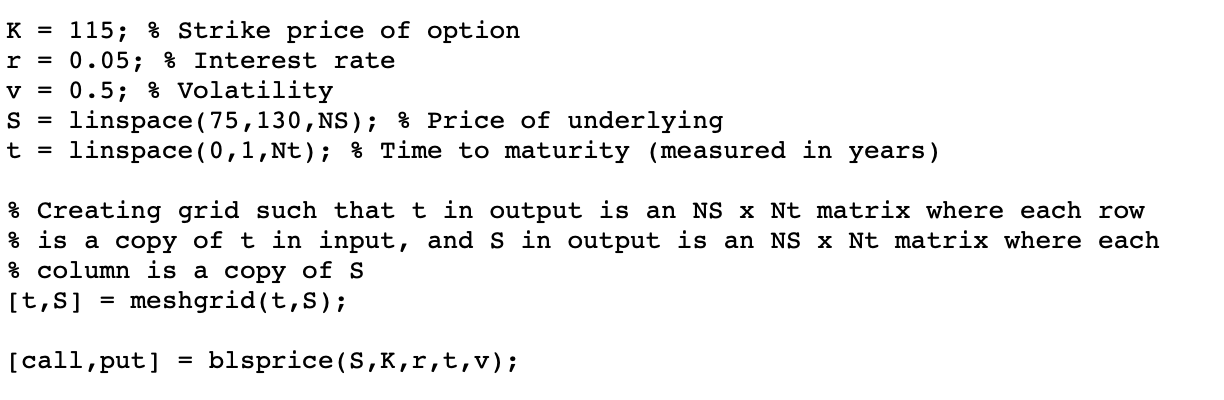

In [9]:
Image("/Users/sabrina.aufiero/Desktop/COMP0050 Machine Learning with Applications in Finance/Week 6_NN/MatLab.png", width=800)

We have analytically generated option price data using the Black-Scholes formula. In MATLAB, this can be conveniently done using the built-in blsprice function. However, in Python, we needed to manually implement this functionality.

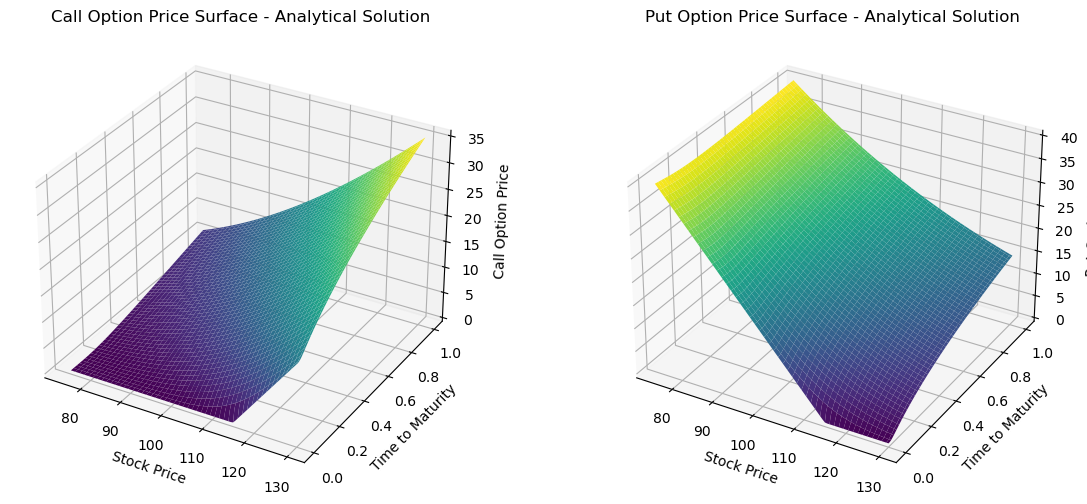

In [12]:
# Plotting surface for call option prices
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(121, projection='3d')
surf1 = ax1.plot_surface(S, t, Pc, cmap='viridis')
#fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)
ax1.set_xlabel('Stock Price')
ax1.set_ylabel('Time to Maturity')
ax1.set_zlabel('Call Option Price')
ax1.set_title('Call Option Price Surface - Analytical Solution')

# Plotting surface for put option prices
ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(S, t, Pp, cmap='viridis')
#fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=5)
ax2.set_xlabel('Stock Price')
ax2.set_ylabel('Time to Maturity')
ax2.set_zlabel('Put Option Price')
ax2.set_title('Put Option Price Surface - Analytical Solution')

plt.show()